## BIBLIOTECAS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
import warnings # Importa a biblioteca warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## 1. DATASET CSV

In [4]:
df = pd.read_csv('/content/drive/MyDrive/simulador 2/global_startup_success_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Startup Name              5000 non-null   object 
 1   Founded Year              5000 non-null   int64  
 2   Country                   5000 non-null   object 
 3   Industry                  5000 non-null   object 
 4   Funding Stage             5000 non-null   object 
 5   Total Funding ($M)        5000 non-null   int64  
 6   Number of Employees       5000 non-null   int64  
 7   Annual Revenue ($M)       5000 non-null   int64  
 8   Valuation ($B)            5000 non-null   float64
 9   Success Score             5000 non-null   int64  
 10  Acquired?                 5000 non-null   object 
 11  IPO?                      5000 non-null   object 
 12  Customer Base (Millions)  5000 non-null   int64  
 13  Tech Stack                5000 non-null   object 
 14  Social M

## Objetivo: Gerar estatísticas descritivas para as colunas numéricas.

In [ ]:
print(df.describe())

       Founded Year  Total Funding ($M)  Number of Employees  \
count   5000.000000         5000.000000          5000.000000   
mean    2010.960400          251.409400          2484.582800   
std        6.628123          143.924874          1451.626957   
min     2000.000000            1.000000             5.000000   
25%     2005.000000          125.750000          1233.750000   
50%     2011.000000          255.000000          2493.000000   
75%     2017.000000          376.000000          3730.500000   
max     2022.000000          499.000000          4998.000000   

       Annual Revenue ($M)  Valuation ($B)  Success Score  \
count          5000.000000     5000.000000    5000.000000   
mean            495.721600       25.237284       4.965000   
std             290.071494       14.509278       2.574316   
min               1.000000        0.110000       1.000000   
25%             240.750000       12.845000       3.000000   
50%             496.000000       25.460000       5.000000

## 2. ETL - Limpeza e Tratamento de Dados

In [ ]:
# Verificando valores ausentes
print(df.isnull().sum())

Startup Name                0
Founded Year                0
Country                     0
Industry                    0
Funding Stage               0
Total Funding ($M)          0
Number of Employees         0
Annual Revenue ($M)         0
Valuation ($B)              0
Success Score               0
Acquired?                   0
IPO?                        0
Customer Base (Millions)    0
Tech Stack                  0
Social Media Followers      0
dtype: int64


In [ ]:
# Padronizando colunas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)

In [ ]:
# Excluindo registros sem nome de startup
df = df.dropna(subset=['startup_name'])

In [ ]:
# Convertendo datas, se aplicável
if 'date_joined' in df.columns:
    df['date_joined'] = pd.to_datetime(df['date_joined'], errors='coerce')


In [ ]:
# Visualizando tipos de dados
df.dtypes


startup_name                 object
founded_year                  int64
country                      object
industry                     object
funding_stage                object
total_funding_($m)            int64
number_of_employees           int64
annual_revenue_($m)           int64
valuation_($b)              float64
success_score                 int64
acquired                     object
ipo                          object
customer_base_(millions)      int64
tech_stack                   object
social_media_followers        int64
dtype: object

In [ ]:
# (Idade) é mais útil que o ano de fundação.
from datetime import datetime

current_year = datetime.now().year
df['Startup Age'] = current_year - df['founded_year']
print("\nColuna 'Startup Age' criada com sucesso.")


Coluna 'Startup Age' criada com sucesso.


In [ ]:
df = df.rename(columns={
    'startup_name': 'Nome da Startup',
    'country': 'País',
    'industry': 'Setor',
    'funding_stage': 'Estágio de Financiamento',
    'total_funding_($m)': 'Financiamento Total (em $M)',
    'number_of_employees': 'Número de Funcionários',
    'annual_revenue_($m)': 'Receita Anual (em $M)',
    'valuation_($b)': 'Avaliação de Mercado (em $B)',
    'ipo': 'IPO',
    'acquired': 'Adquirida',
    'success_score': 'Índice de Sucesso',
    'founded_year': 'Ano de Fundação',
    'tech_stack': 'Tecnologias Utilizadas',
    'social_media_followers': 'Seguidores nas Redes Sociais',
    'customer_base_(millions)': 'Base de Clientes (em Milhões)',
    'Startup Age': 'Idade da Startup'
})


In [ ]:
df_corr = df.copy()
for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col], _ = pd.factorize(df_corr[col])

correlation_matrix = df_corr.corr()
print(correlation_matrix['Índice de Sucesso'].sort_values(ascending=False))

Índice de Sucesso                1.000000
Seguidores nas Redes Sociais     0.014993
Financiamento Total (em $M)      0.011716
Avaliação de Mercado (em $B)     0.009130
IPO                              0.007594
Ano de Fundação                  0.004116
Tecnologias Utilizadas           0.003981
Adquirida                        0.003676
Estágio de Financiamento        -0.001751
Idade da Startup                -0.004116
Receita Anual (em $M)           -0.004188
Nome da Startup                 -0.005300
Setor                           -0.011117
Número de Funcionários          -0.013319
Base de Clientes (em Milhões)   -0.020083
País                            -0.024134
Name: Índice de Sucesso, dtype: float64


In [ ]:
df['Adquirida'] = df['Adquirida'].map({'Yes': True, 'No': False})
df['IPO'] = df['IPO'].map({'Yes': True, 'No': False})



In [ ]:
colunas_numericas = [
    'Financiamento Total (em $M)',
    'Número de Funcionários',
    'Receita Anual (em $M)',
    'Avaliação de Mercado (em $B)',
    'Base de Clientes (em Milhões)',
    'Idade da Startup'
]


In [ ]:
for col in colunas_numericas:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        print(f"{col}: {len(outliers)} outliers")
    else:
        print(f" Coluna '{col}' não encontrada em df_tratado.")


Financiamento Total (em $M): 0 outliers
Número de Funcionários: 0 outliers
Receita Anual (em $M): 0 outliers
Avaliação de Mercado (em $B): 0 outliers
Base de Clientes (em Milhões): 0 outliers
Idade da Startup: 0 outliers


##3. EDA - Análise Exploratória de Dados

In [ ]:
print("Top 10 setores com mais startups:")
print(df['Setor'].value_counts().head(10))

Top 10 setores com mais startups:
Setor
Tech          524
Gaming        520
EdTech        518
Energy        510
Logistics     509
AI            501
FinTech       496
E-commerce    483
Healthcare    474
FoodTech      465
Name: count, dtype: int64


In [ ]:
print("Top 10 países com mais startups:")
print(df['País'].value_counts().head(10))

Top 10 países com mais startups:
País
Germany      539
Brazil       519
Japan        502
UK           501
USA          501
Canada       498
China        491
France       491
Australia    480
India        478
Name: count, dtype: int64


In [ ]:
print(" Estágios de investimento:")
print(df['Estágio de Financiamento'].value_counts())

 Estágios de investimento:
Estágio de Financiamento
IPO         1037
Seed        1008
Series A    1003
Series B     983
Series C     969
Name: count, dtype: int64


In [ ]:
print(" Estatísticas de financiamento por setor (TOP 10):")
print(df.groupby('Setor')['Financiamento Total (em $M)'].agg(['count', 'mean', 'median', 'sum']).sort_values(by='sum', ascending=False).head(10))

 Estatísticas de financiamento por setor (TOP 10):
            count        mean  median     sum
Setor                                        
Logistics     509  267.390963   270.0  136102
Tech          524  259.505725   275.5  135981
Energy        510  258.688235   266.0  131931
AI            501  257.417166   272.0  128966
EdTech        518  247.542471   252.0  128227
Gaming        520  242.128846   235.5  125907
FinTech       496  249.497984   245.0  123751
Healthcare    474  247.953586   252.5  117530
E-commerce    483  241.985507   234.0  116879
FoodTech      465  240.372043   241.0  111773


In [ ]:
print(" Estatísticas de Avaliação por país (TOP 10):")
print(df.groupby('Setor')['Avaliação de Mercado (em $B)'].agg(['count', 'mean', 'median', 'sum']).sort_values(by='sum', ascending=False).head(10))

 Estatísticas de Avaliação por país (TOP 10):
            count       mean  median       sum
Setor                                         
Tech          524  25.444027  26.315  13332.67
Energy        510  26.041647  26.660  13281.24
Gaming        520  24.844827  25.460  12919.31
EdTech        518  24.794266  24.305  12843.43
FinTech       496  25.733508  24.850  12763.82
Logistics     509  24.868369  24.890  12658.00
AI            501  24.588104  24.200  12318.64
Healthcare    474  25.854473  26.675  12255.02
E-commerce    483  24.723561  24.670  11941.48
FoodTech      465  25.532925  25.640  11872.81


In [ ]:
# Atualizando numeric_cols com os nomes exatos presentes
numeric_cols = ['Financiamento Total (em $M)', 'Número de Funcionários', 'Receita Anual (em $M)',
                'Avaliação de Mercado (em $B)', 'Índice de Sucesso', 'Base de Clientes (em Milhões)',
                'Seguidores nas Redes Sociais', 'Idade da Startup']

In [ ]:
print("Estatísticas Descritivas:")
print(df[numeric_cols].describe())

Estatísticas Descritivas:
       Financiamento Total (em $M)  Número de Funcionários  \
count                  5000.000000             5000.000000   
mean                    251.409400             2484.582800   
std                     143.924874             1451.626957   
min                       1.000000                5.000000   
25%                     125.750000             1233.750000   
50%                     255.000000             2493.000000   
75%                     376.000000             3730.500000   
max                     499.000000             4998.000000   

       Receita Anual (em $M)  Avaliação de Mercado (em $B)  Índice de Sucesso  \
count            5000.000000                   5000.000000        5000.000000   
mean              495.721600                     25.237284           4.965000   
std               290.071494                     14.509278           2.574316   
min                 1.000000                      0.110000           1.000000   
25%       

###1. Informações Gerais

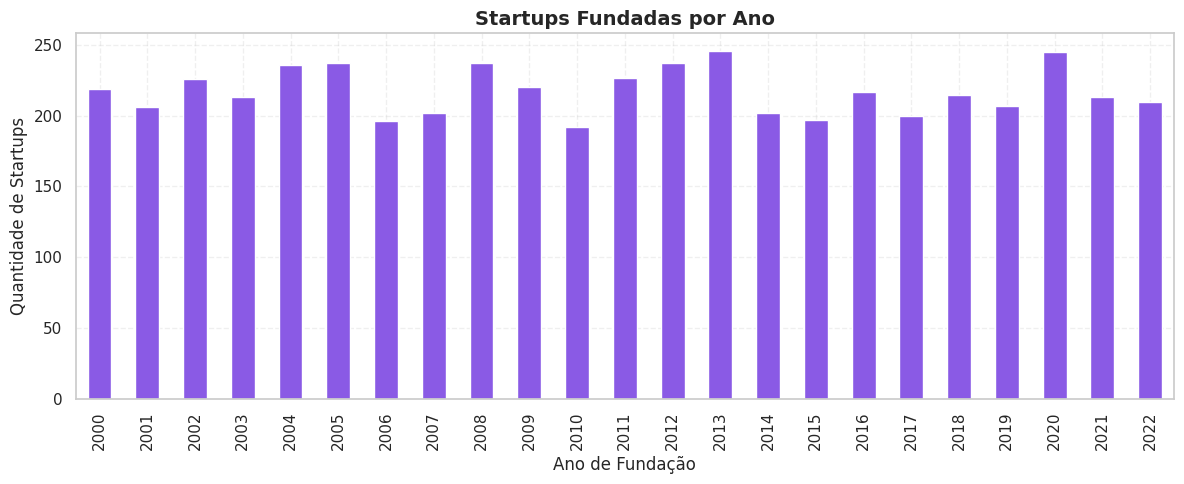

In [ ]:
plt.figure(figsize=(12, 5))
df['Ano de Fundação'].value_counts().sort_index().plot(kind='bar',color='#8a5ae5')

plt.title('Startups Fundadas por Ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano de Fundação', fontsize=12)
plt.ylabel('Quantidade de Startups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### 2. Financiamento

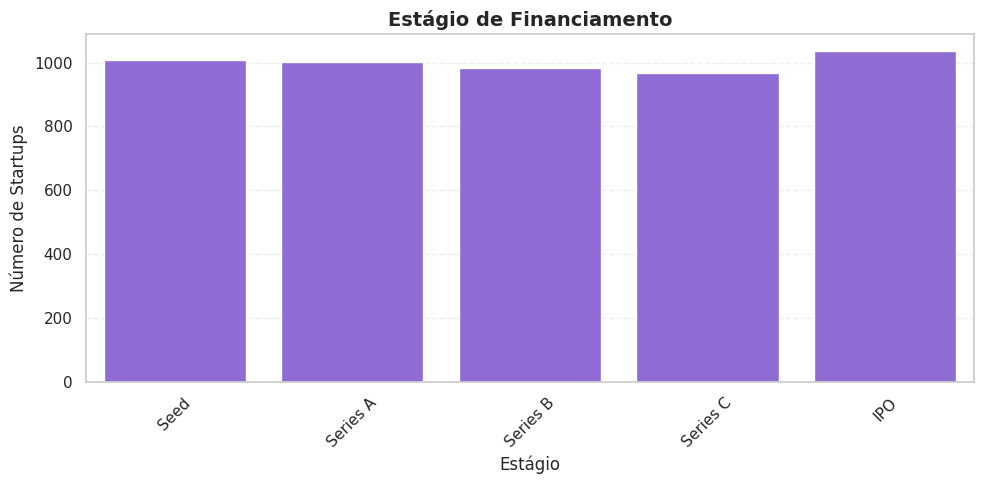

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Estágio de Financiamento", order=["Seed", "Series A", "Series B", "Series C", "IPO"],color='#8a5ae5')
plt.title('Estágio de Financiamento', fontsize=14, fontweight='bold')
plt.xlabel('Estágio', fontsize=12)
plt.ylabel('Número de Startups', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

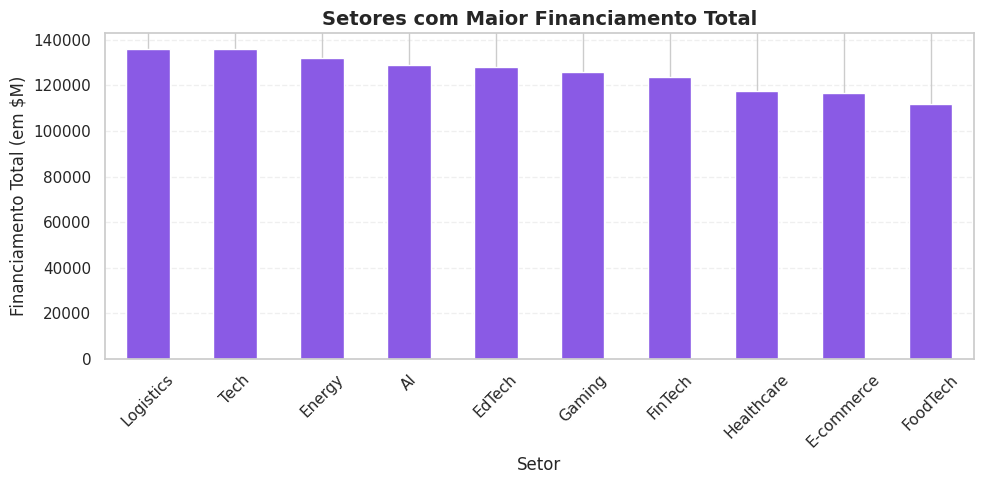

In [ ]:
top_financiamento = df.groupby('Setor')['Financiamento Total (em $M)'] \
    .sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_financiamento.plot(kind='bar', color=cor_roxa)

plt.title('Setores com Maior Financiamento Total', fontsize=14, fontweight='bold')
plt.ylabel('Financiamento Total (em $M)', fontsize=12)
plt.xlabel('Setor', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


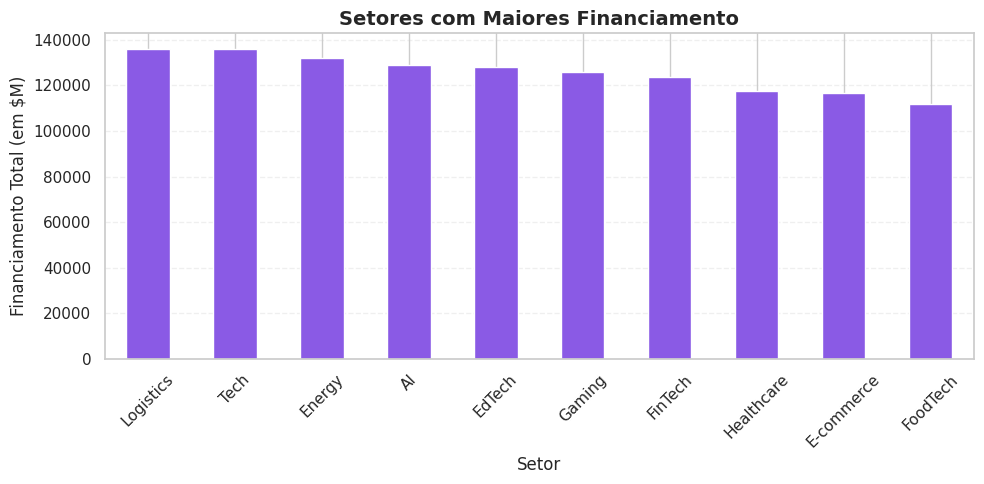

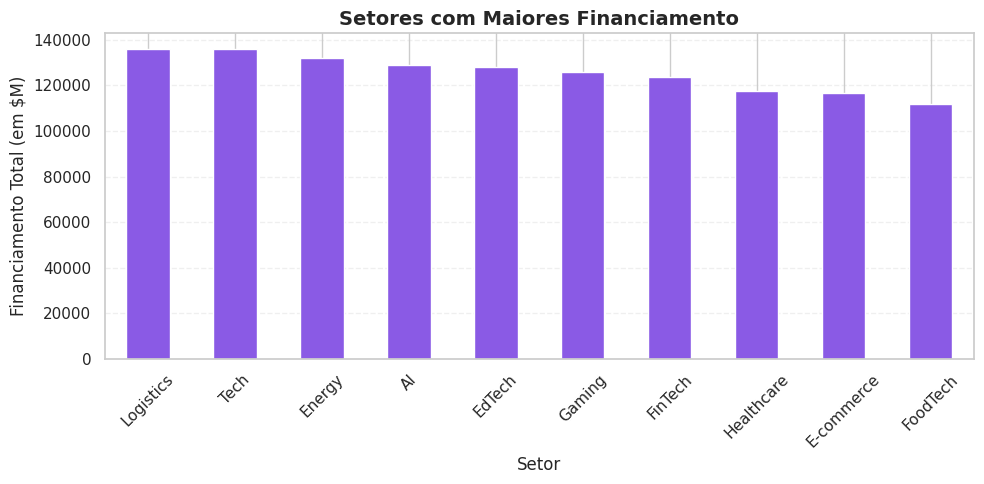

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('Setor')['Financiamento Total (em $M)'] \
  .sum().sort_values(ascending=False).head(10) \
  .plot(kind='bar', color='#8a5ae5')

plt.title('Setores com Maiores Financiamento', fontsize=14, fontweight='bold')
plt.ylabel('Financiamento Total (em $M)', fontsize=12)
plt.xlabel('Setor', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


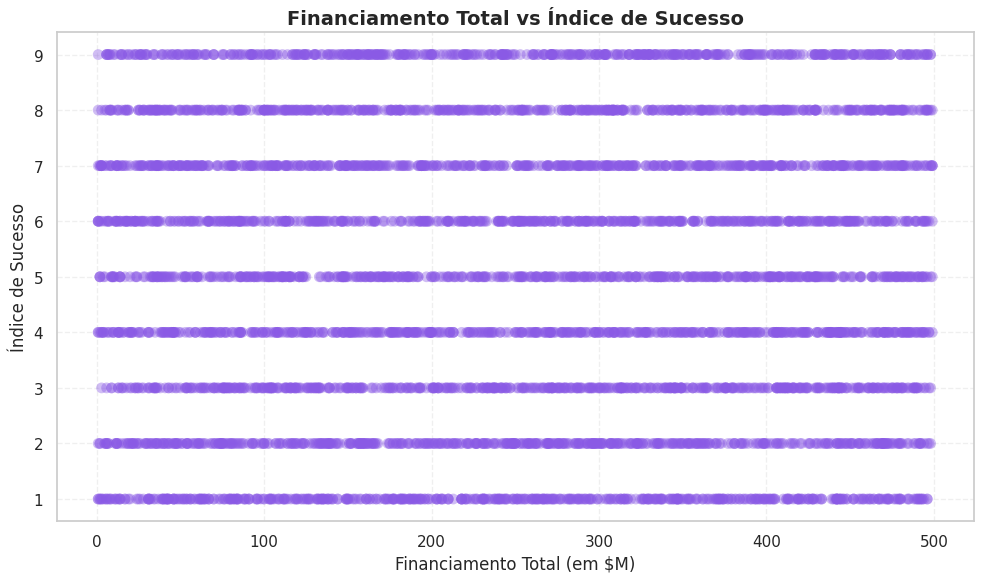

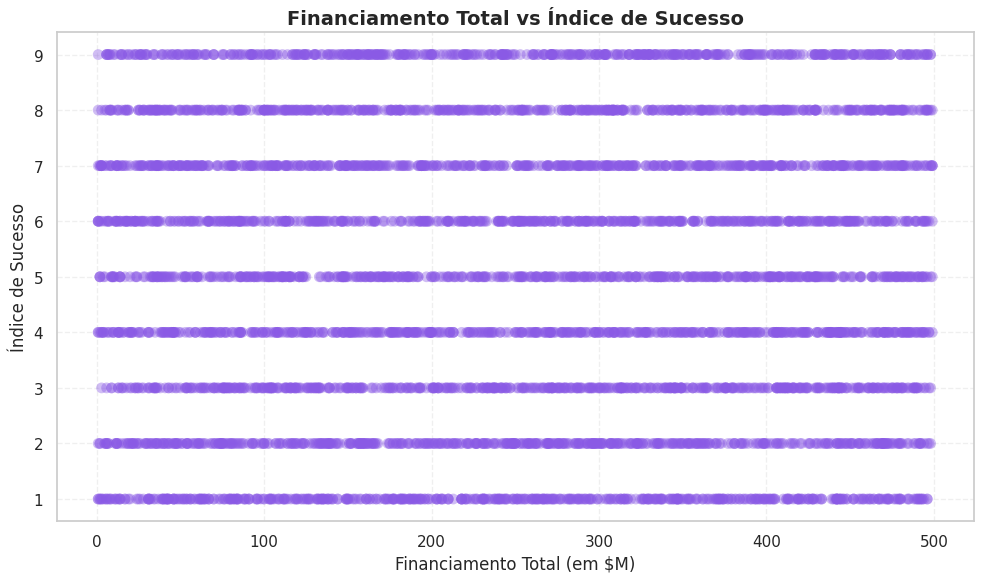

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Financiamento Total (em $M)',
    y='Índice de Sucesso',
    color='#8a5ae5',
    s=60,
    alpha=0.4,
    edgecolor='none')

plt.title('Financiamento Total vs Índice de Sucesso', fontsize=14, fontweight='bold')
plt.xlabel('Financiamento Total (em $M)', fontsize=12)
plt.ylabel('Índice de Sucesso', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


 ### **3**. Avaliação de Mercado e Receita

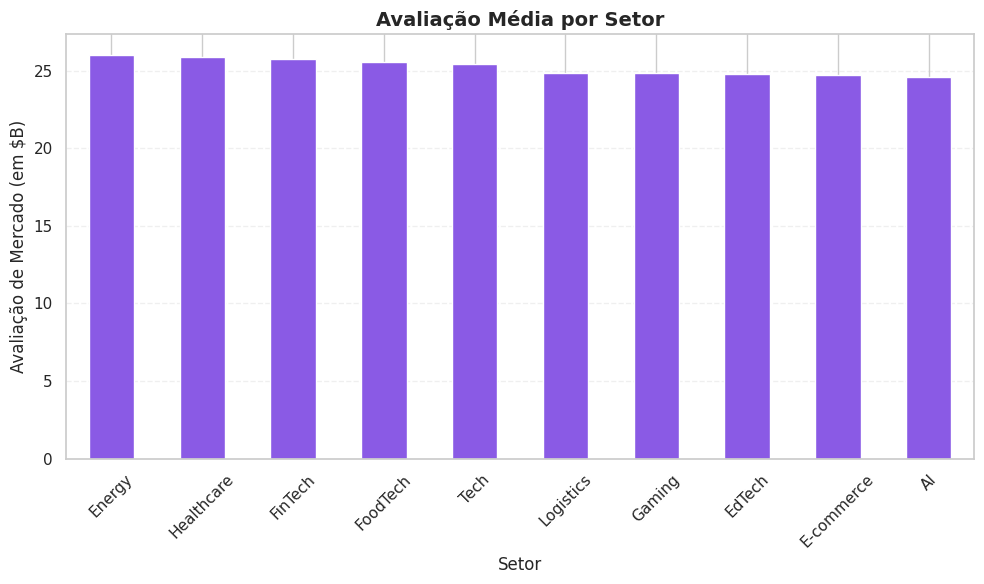

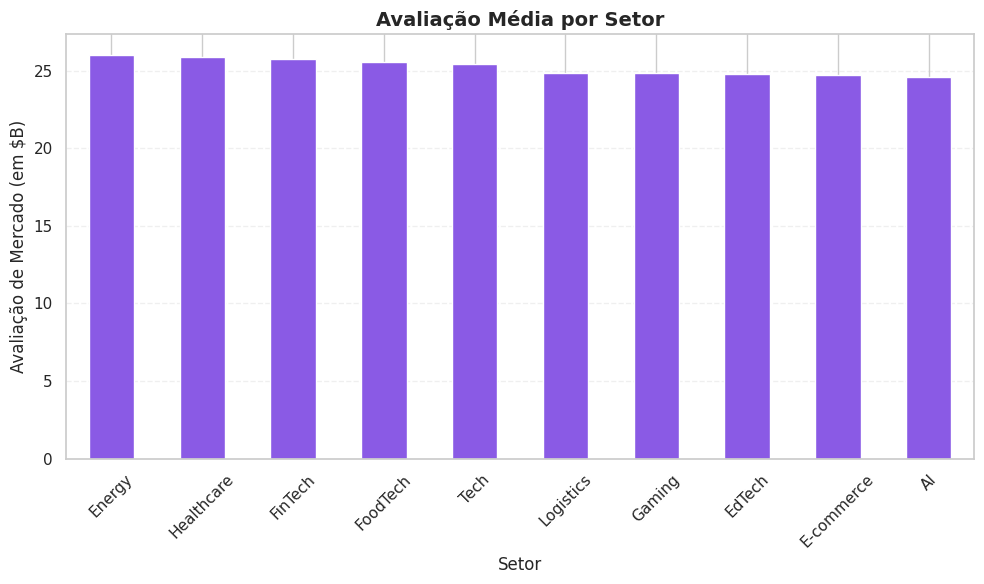

In [ ]:
plt.figure(figsize=(10, 6))

df.groupby('Setor')['Avaliação de Mercado (em $B)']\
  .mean().sort_values(ascending=False).head(10)\
  .plot(kind='bar', color='#8a5ae5')

plt.title('Avaliação Média por Setor', fontsize=14, fontweight='bold')
plt.xlabel('Setor', fontsize=12)
plt.ylabel('Avaliação de Mercado (em $B)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


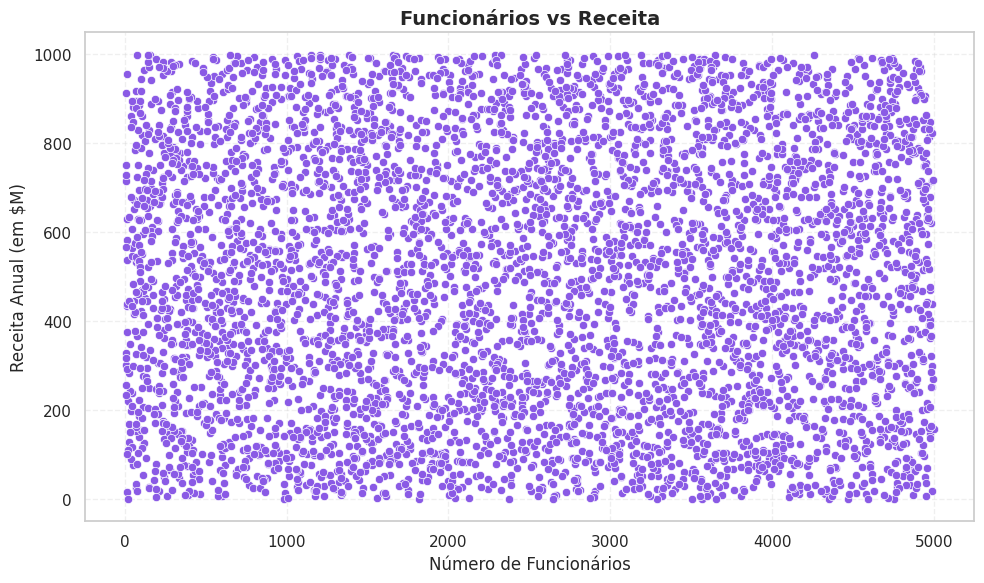

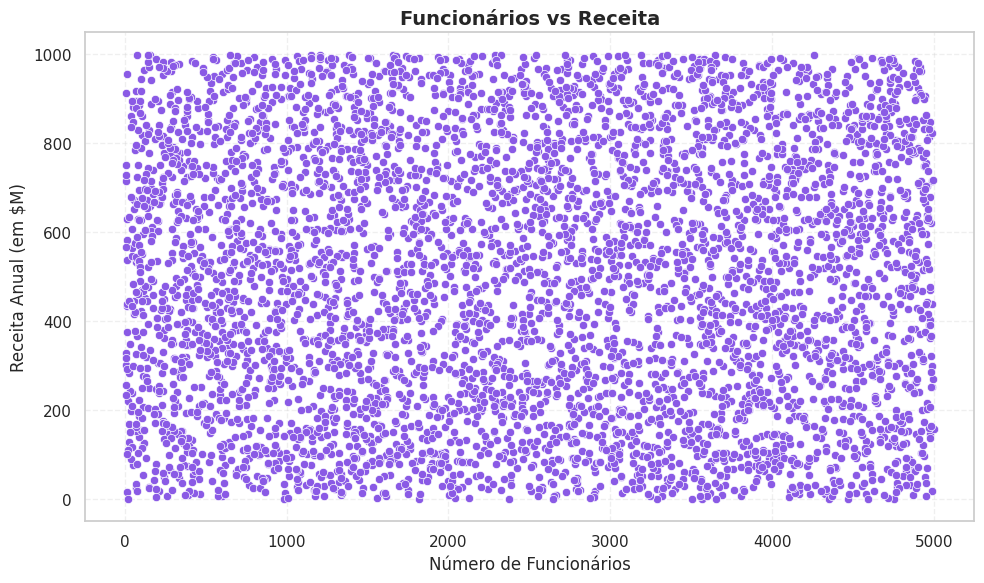

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='Número de Funcionários',
    y='Receita Anual (em $M)',
    color='#8a5ae5')

plt.title('Funcionários vs Receita', fontsize=14, fontweight='bold')
plt.xlabel('Número de Funcionários', fontsize=12)
plt.ylabel('Receita Anual (em $M)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



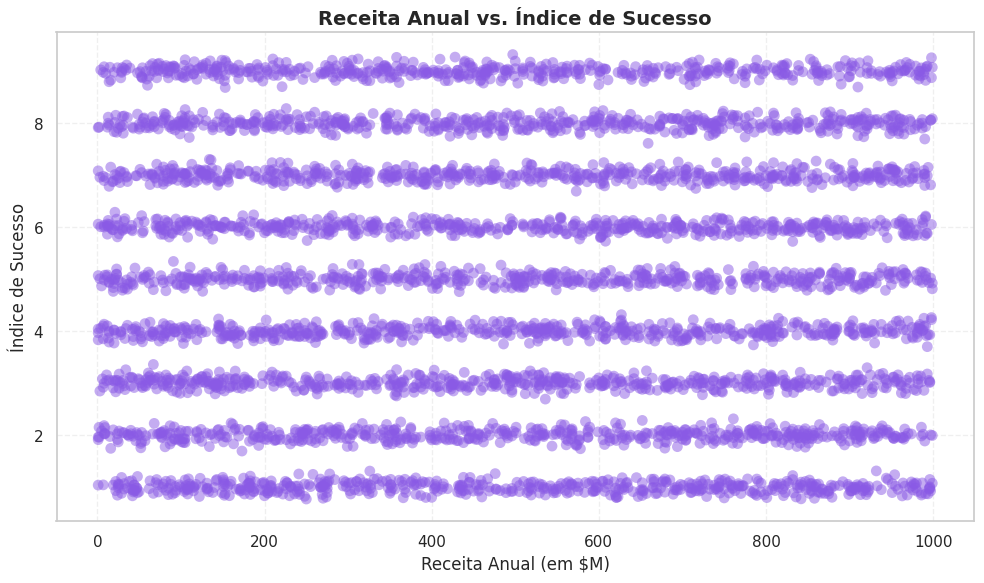

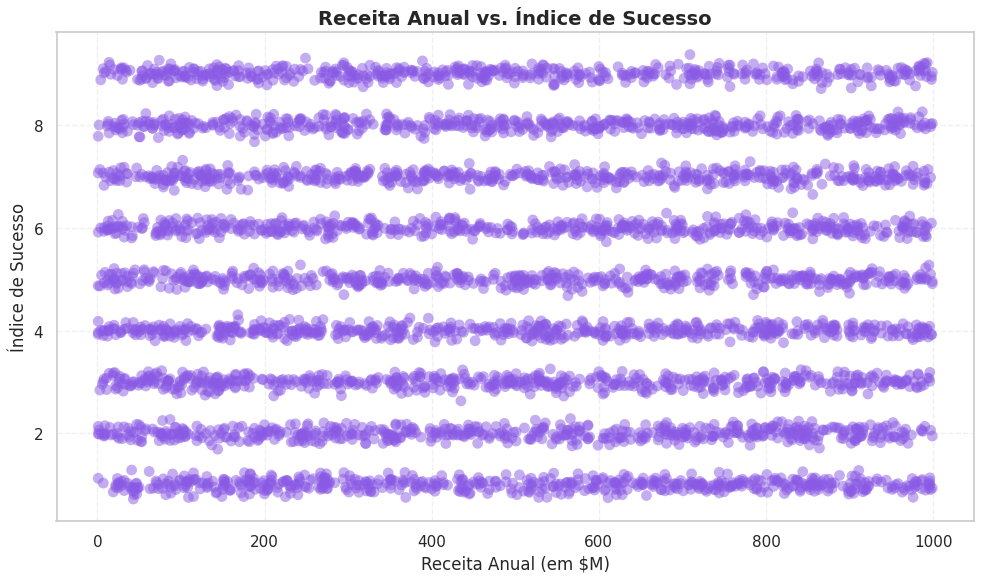

In [ ]:
sucesso_com_receita = df['Índice de Sucesso'] + np.random.normal(0, 0.1, size=len(df))
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Receita Anual (em $M)'],
    sucesso_com_receita,
    color='#8a5ae5',
    alpha=0.5,
    s=60,
    edgecolors='none'
)

plt.title('Receita Anual vs. Índice de Sucesso', fontsize=14, fontweight='bold')
plt.xlabel('Receita Anual (em $M)', fontsize=12)
plt.ylabel('Índice de Sucesso', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-270-504606271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


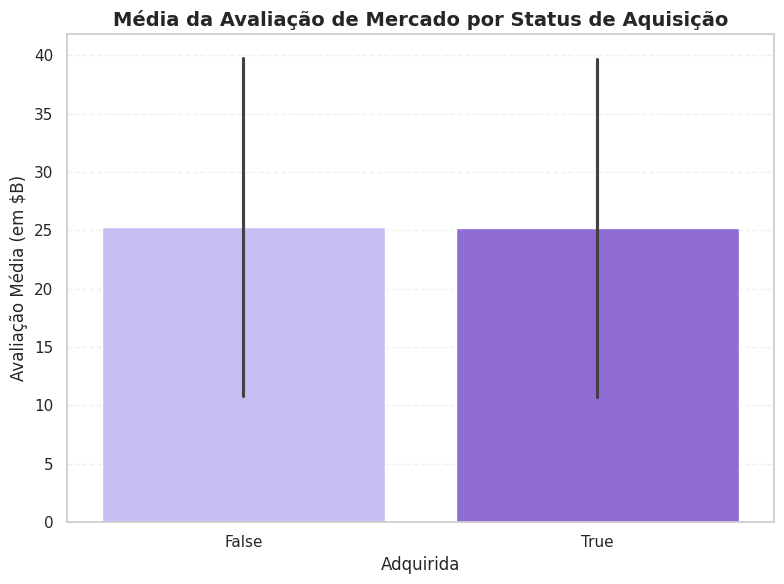

/tmp/ipython-input-304-504606271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


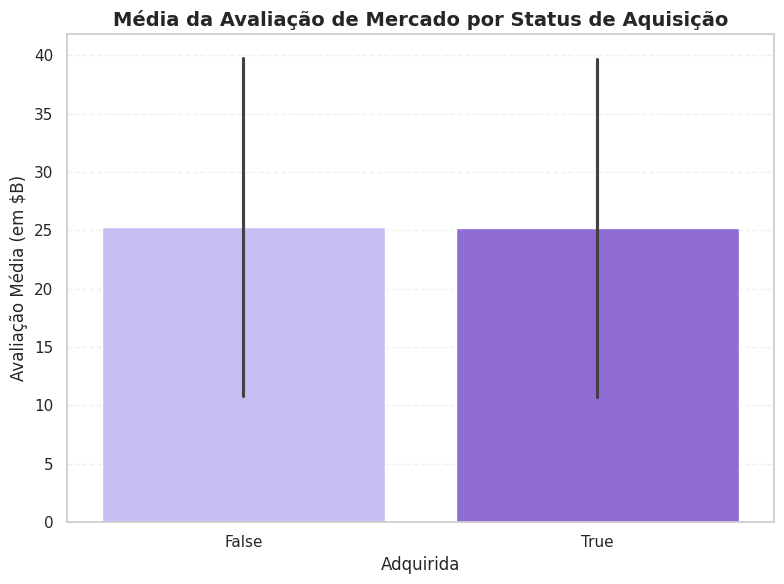

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='Adquirida',
    y='Avaliação de Mercado (em $B)',
    estimator='mean',
    errorbar='sd',
    palette={'True': '#8a5ae5', 'False': '#c4b5fd'}
)

plt.title('Média da Avaliação de Mercado por Status de Aquisição', fontsize=14, fontweight='bold')
plt.xlabel('Adquirida', fontsize=12)
plt.ylabel('Avaliação Média (em $B)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


###4. Tech Stack

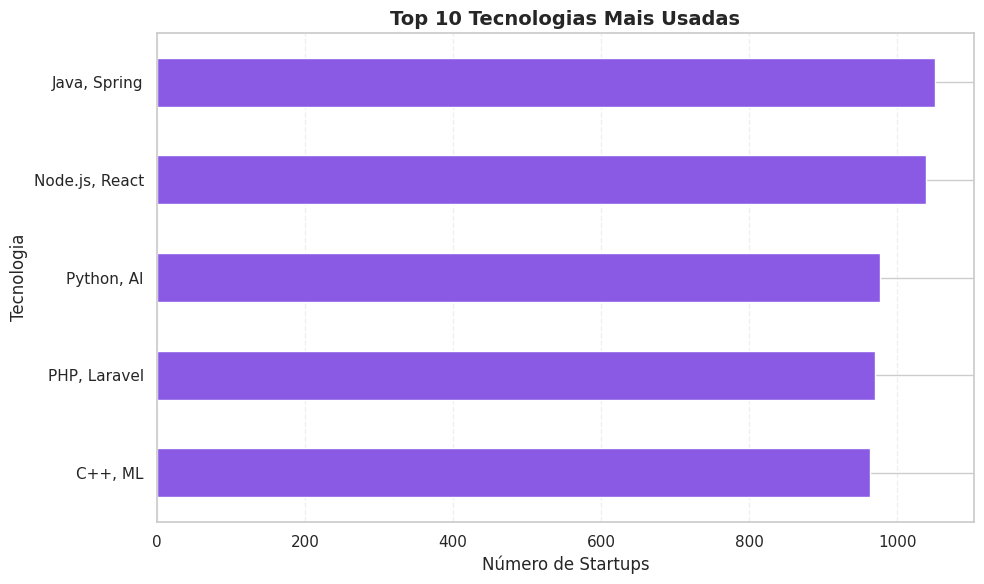

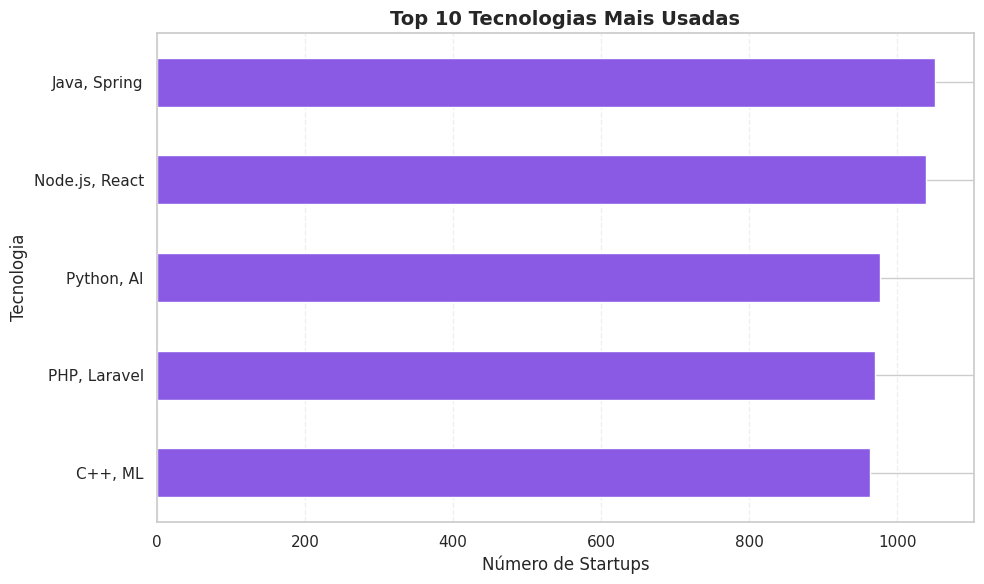

In [ ]:

top_techs = df['Tecnologias Utilizadas'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_techs.sort_values().plot(kind='barh', color='#8a5ae5')

plt.title('Top 10 Tecnologias Mais Usadas', fontsize=14, fontweight='bold')
plt.xlabel('Número de Startups', fontsize=12)
plt.ylabel('Tecnologia', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

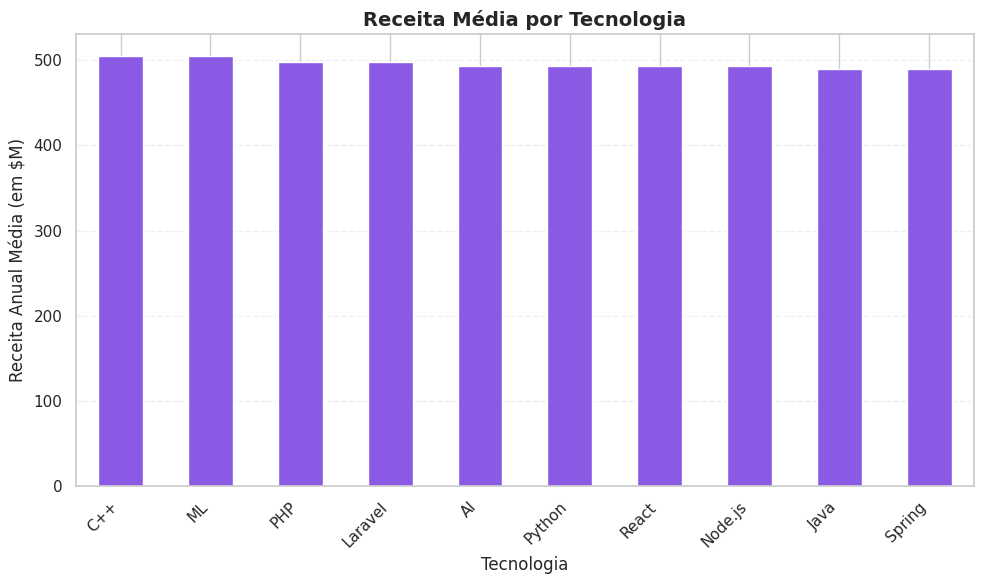

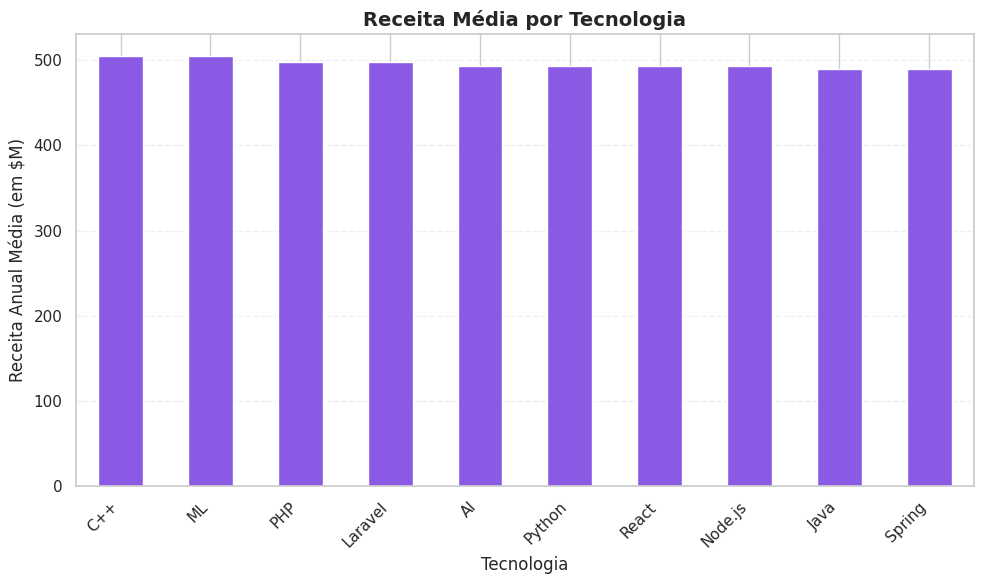

In [ ]:
df['tech_stack_list'] = df['Tecnologias Utilizadas'].str.split(', ')
exploded = df.explode('tech_stack_list')

plt.figure(figsize=(10, 6))
exploded.groupby('tech_stack_list')['Receita Anual (em $M)']\
    .mean()\
    .sort_values(ascending=False)\
    .head(10)\
    .plot(kind='bar', color='#8a5ae5')

plt.title('Receita Média por Tecnologia', fontsize=14, fontweight='bold')
plt.xlabel('Tecnologia', fontsize=12)
plt.ylabel('Receita Anual Média (em $M)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


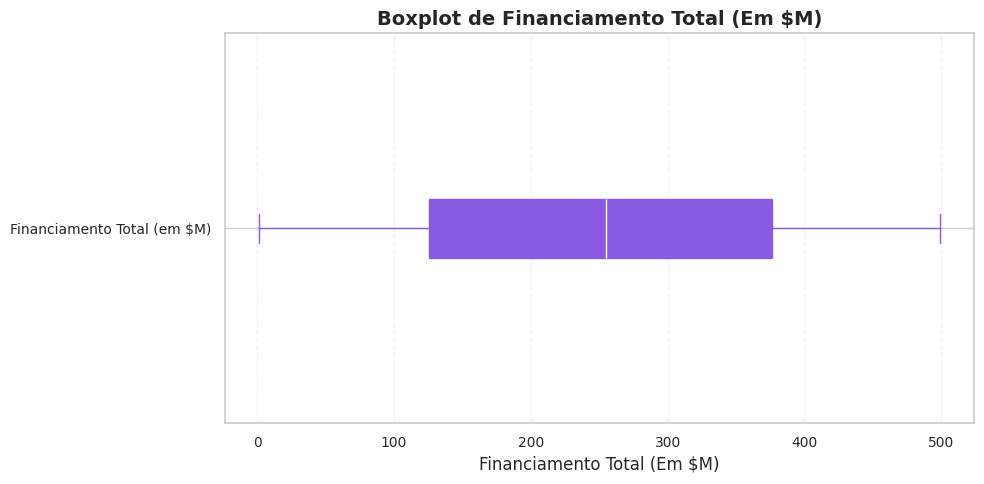

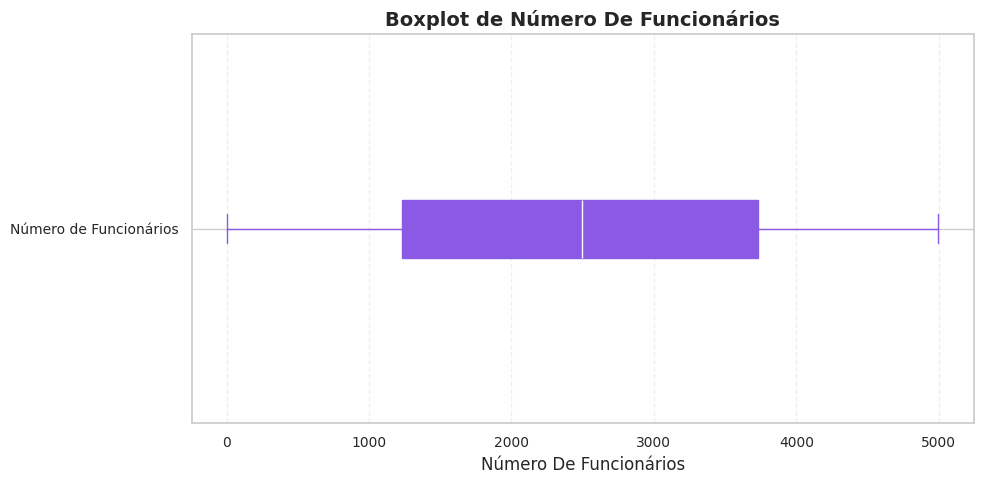

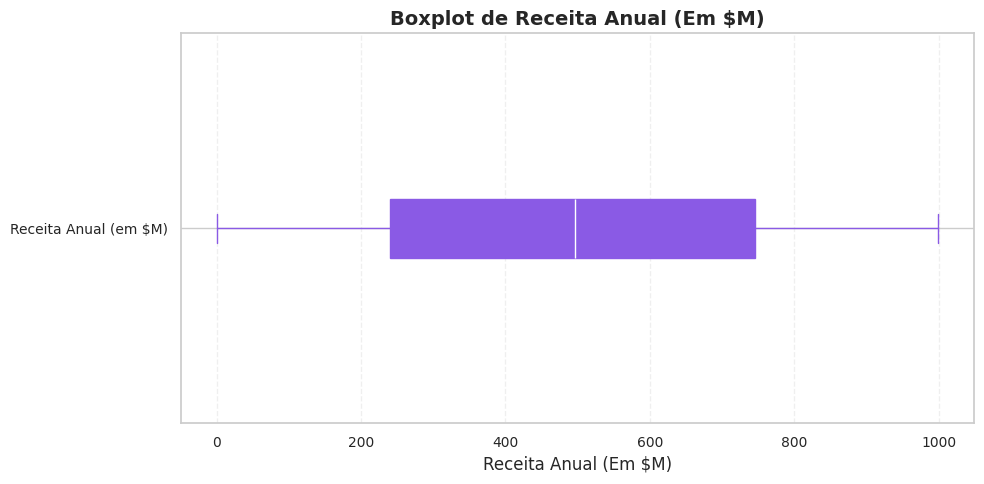

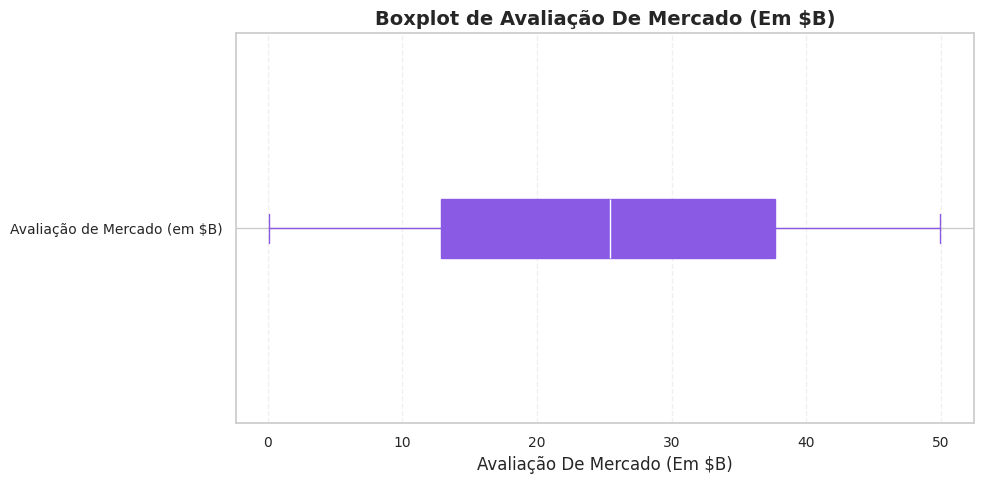

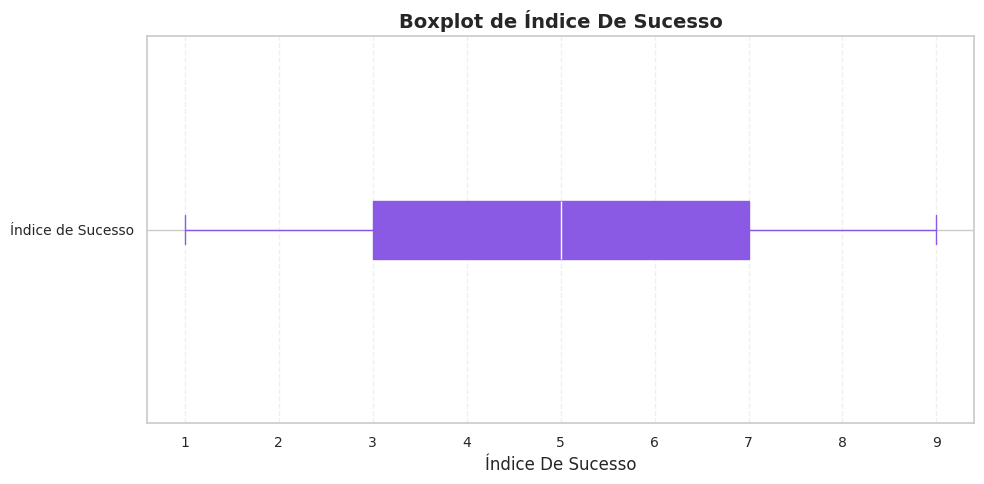

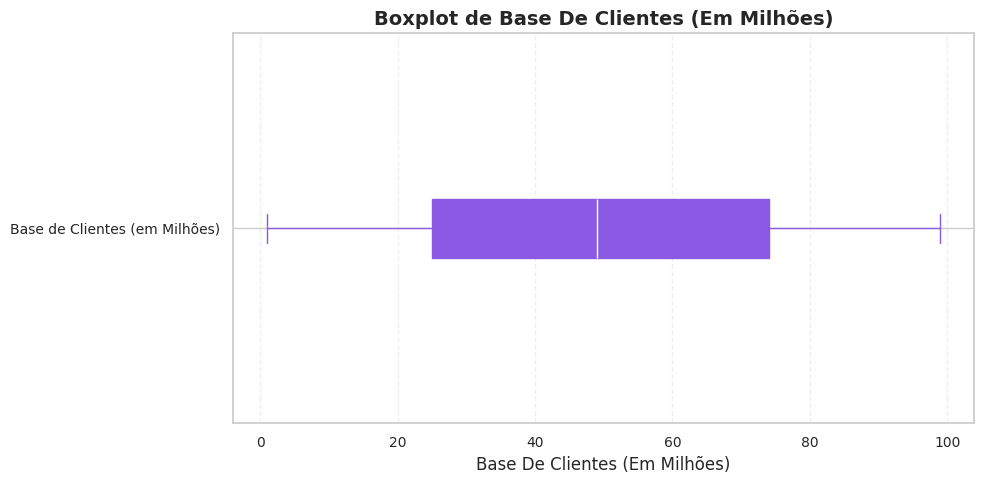

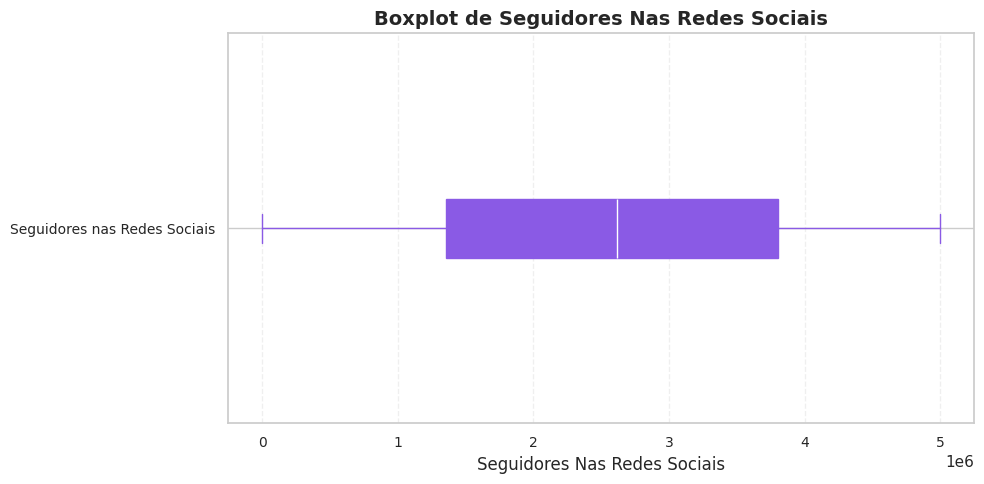

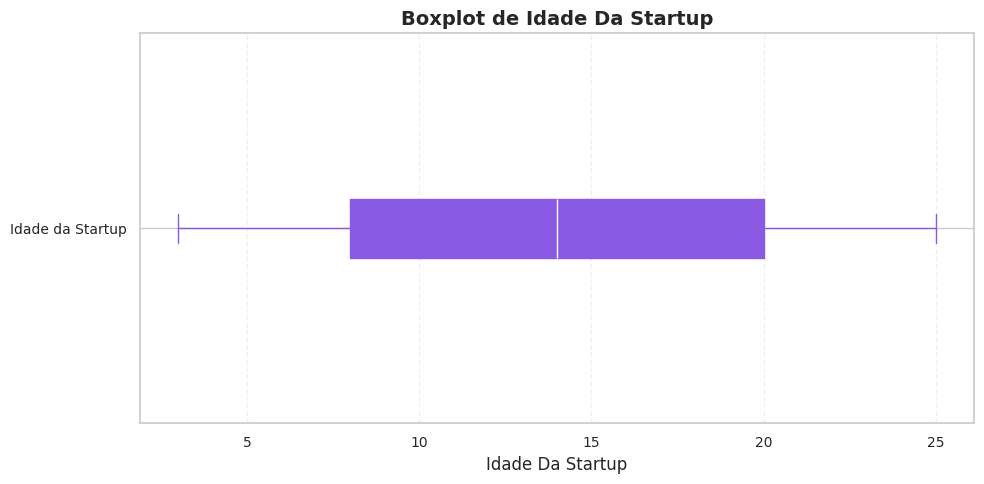

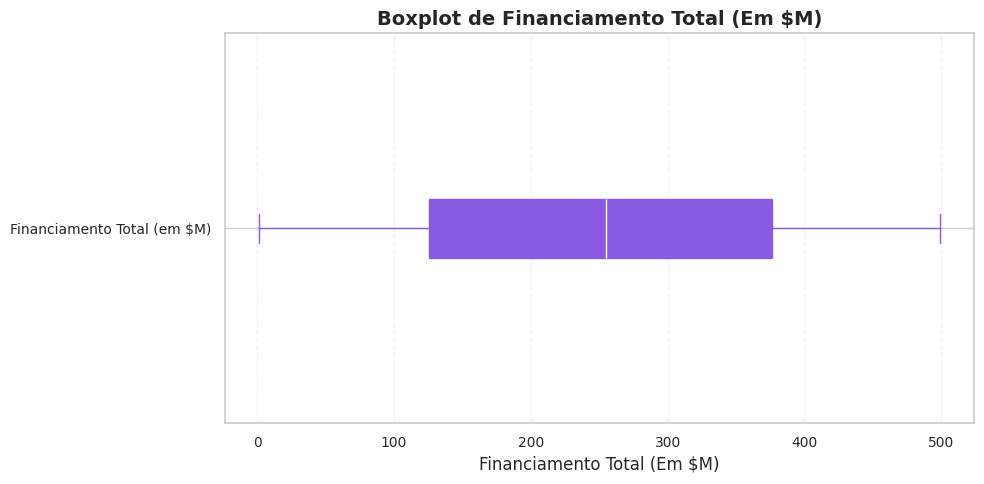

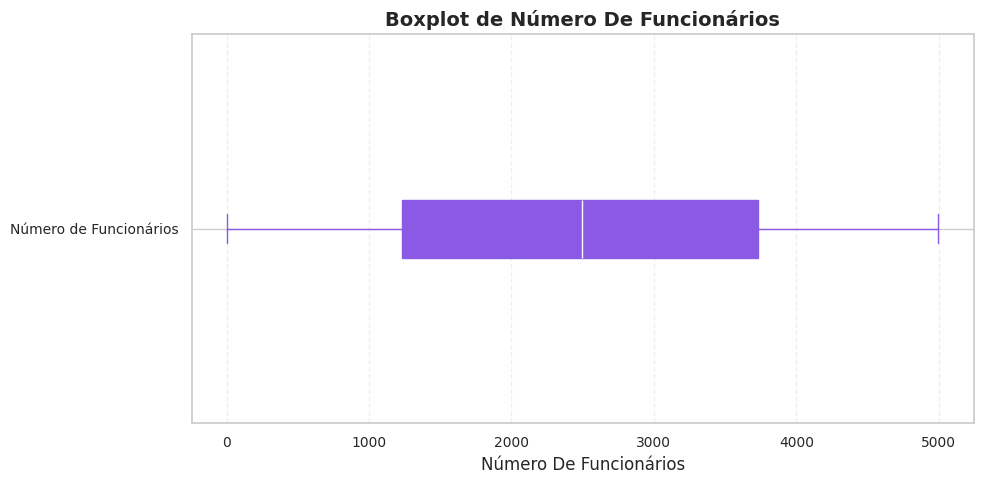

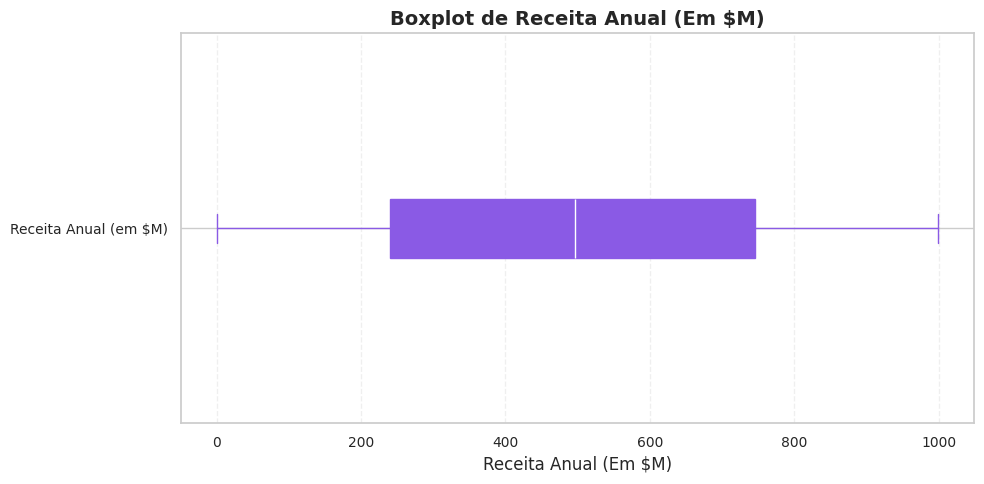

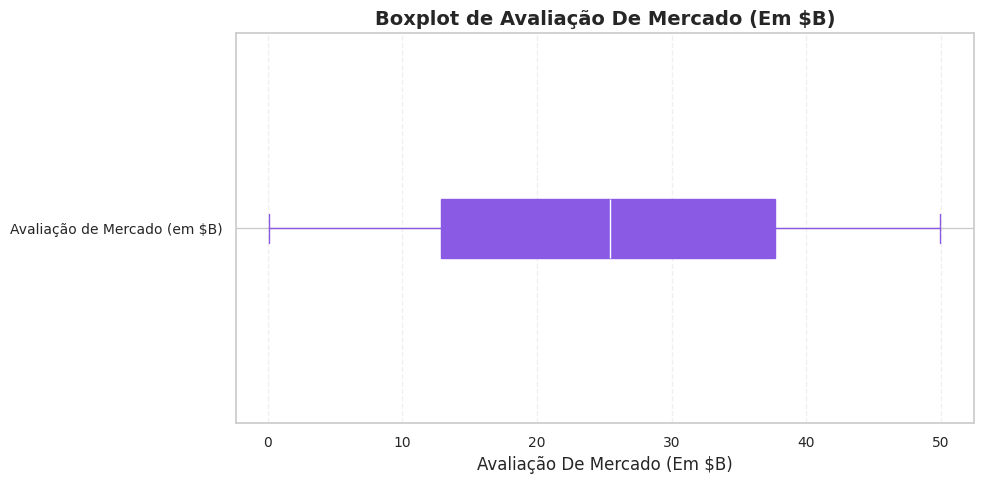

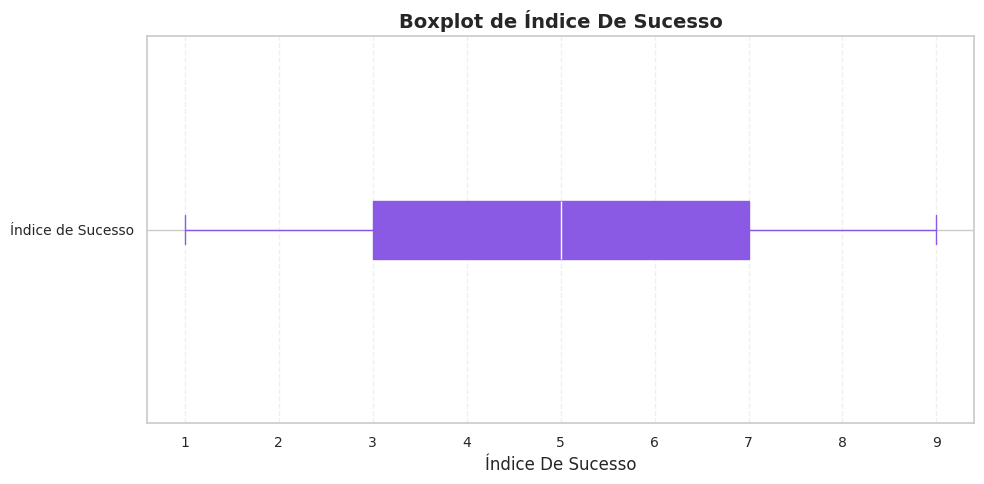

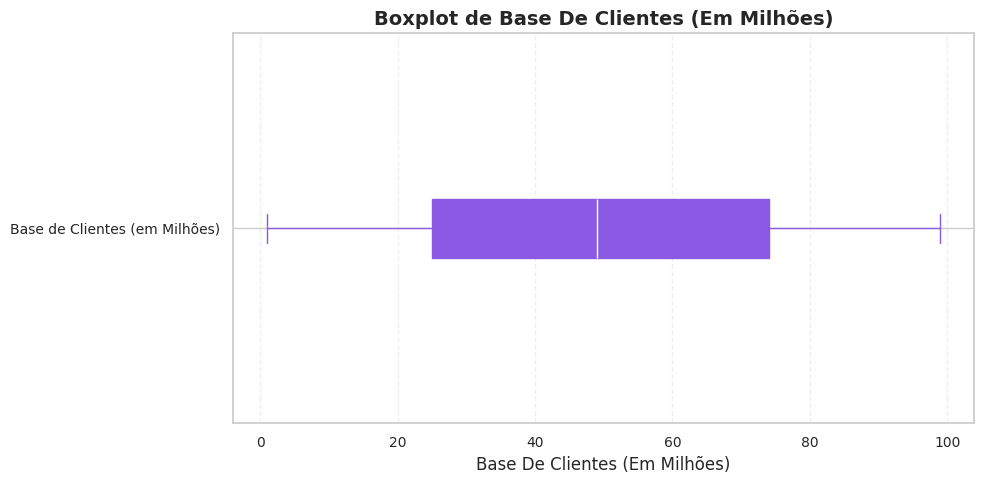

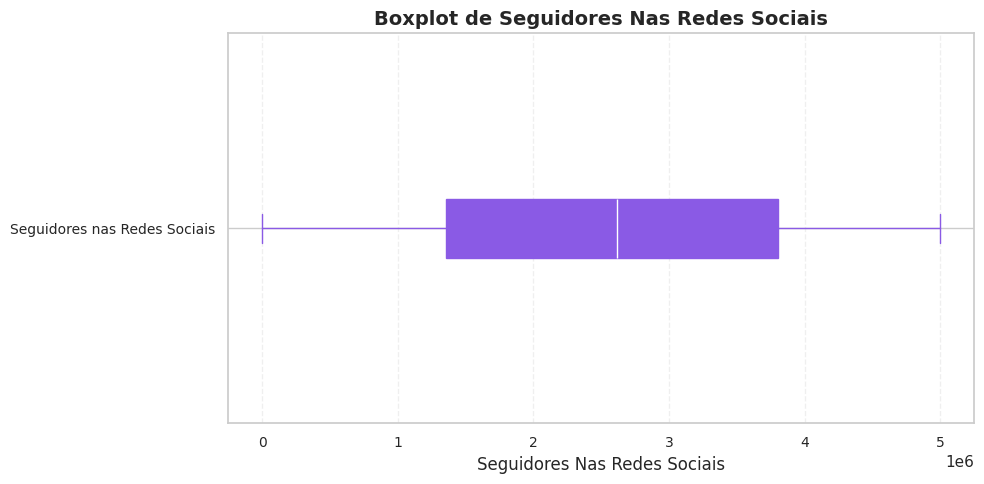

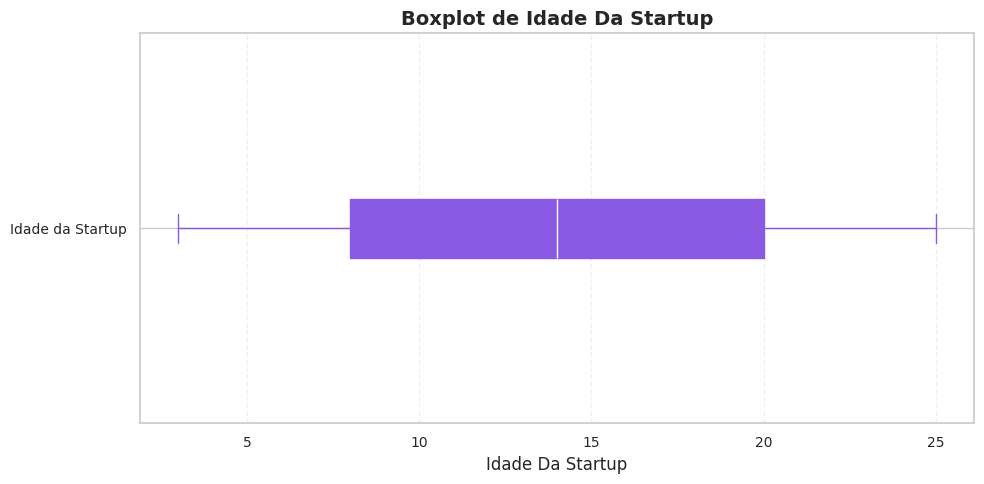

In [ ]:
figsize_padrao = (10, 5)
fonte_titulo = {'fontsize': 14, 'fontweight': 'bold'}
fonte_eixos = {'fontsize': 12}
cor_roxa = "#8a5ae5"

for col in numeric_cols:
    plt.figure(figsize=figsize_padrao)
    df.boxplot(
        column=col,
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor=cor_roxa, color=cor_roxa),
        whiskerprops=dict(color=cor_roxa),
        capprops=dict(color=cor_roxa),
        medianprops=dict(color='white'),
        flierprops=dict(marker='o', markerfacecolor=cor_roxa, markeredgecolor='gray', alpha=0.3)
    )
    plt.title(f'Boxplot de {col.replace("_", " ").title()}', **fonte_titulo)
    plt.xlabel(col.replace("_", " ").title(), **fonte_eixos)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()



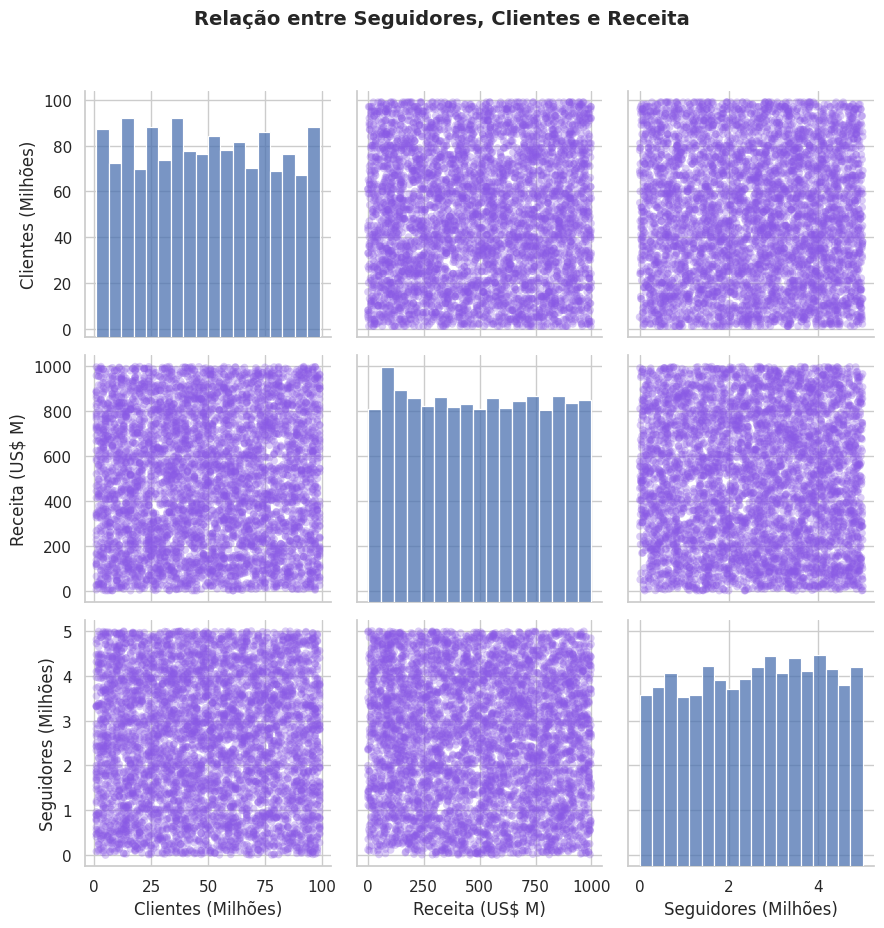

In [ ]:
df_pairplot = df[['Seguidores nas Redes Sociais', 'Base de Clientes (em Milhões)', 'Receita Anual (em $M)']].copy()
df_pairplot['Seguidores (Milhões)'] = df_pairplot['Seguidores nas Redes Sociais'] / 1e6
df_pairplot.drop(columns=['Seguidores nas Redes Sociais'], inplace=True)
df_pairplot.rename(columns={
    'Base de Clientes (em Milhões)': 'Clientes (Milhões)',
    'Receita Anual (em $M)': 'Receita (US$ M)'
}, inplace=True)
sns.set(style='whitegrid')
custom_color = '#8a5ae5'
plot = sns.pairplot(
    df_pairplot,
    kind="scatter",
    plot_kws={
        'alpha': 0.3,
        'color': custom_color,
        's': 30,
        'edgecolor': 'none'
    },
    height=3,
    aspect=1)

plot.fig.suptitle('Relação entre Seguidores, Clientes e Receita', fontsize=14, fontweight='bold', y=1.03)

plt.tight_layout()
plt.show()


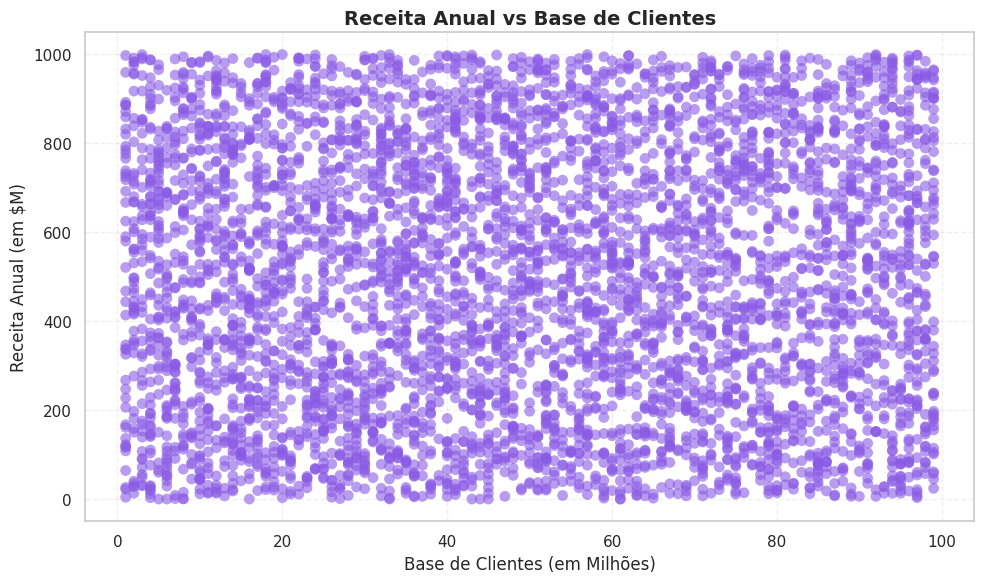

In [ ]:

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Gráfico de dispersão
sns.scatterplot(
    data=df,
    x='Base de Clientes (em Milhões)',
    y='Receita Anual (em $M)',
    color='#8a5ae5',
    s=60,
    alpha=0.6,
    edgecolor='none')

plt.title('Receita Anual vs Base de Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Base de Clientes (em Milhões)', fontsize=12)
plt.ylabel('Receita Anual (em $M)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


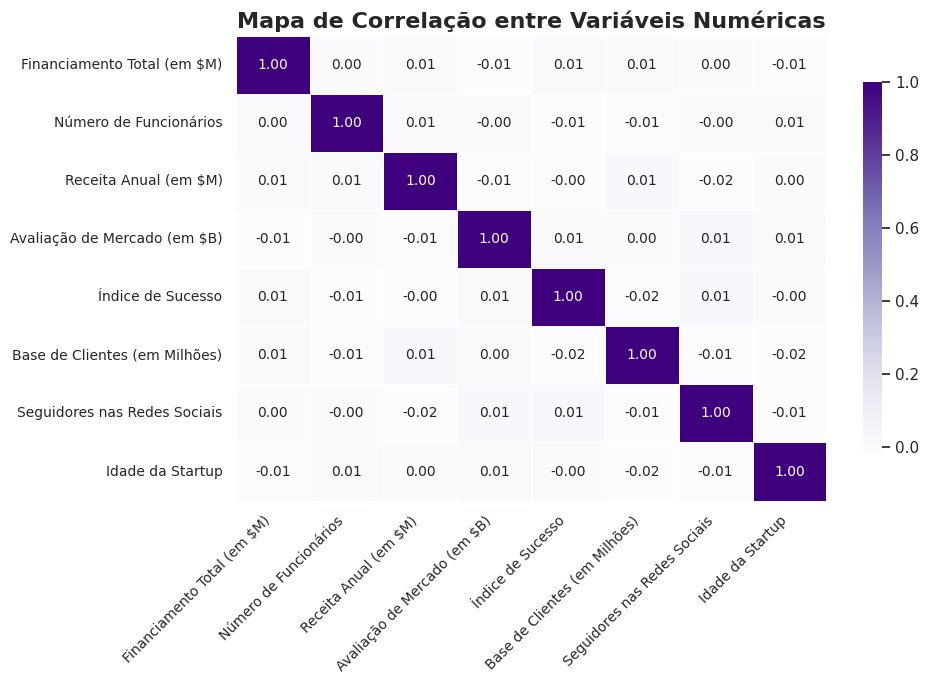

In [ ]:
plt.figure(figsize=(10, 7))
corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="Purples",
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8},
    annot_kws={"fontsize": 10}
)

plt.title("Mapa de Correlação entre Variáveis Numéricas", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
if 'Status da Startup' not in df.columns:
    df['Status da Startup'] = 'Operação'
    df.loc[df['IPO'] == True, 'Status da Startup'] = 'IPO'
    df.loc[df['Adquirida'] == True, 'Status da Startup'] = 'Adquirida'
print(df['Status da Startup'].value_counts())

Status da Startup
Adquirida    2533
Operação     1284
IPO          1183
Name: count, dtype: int64


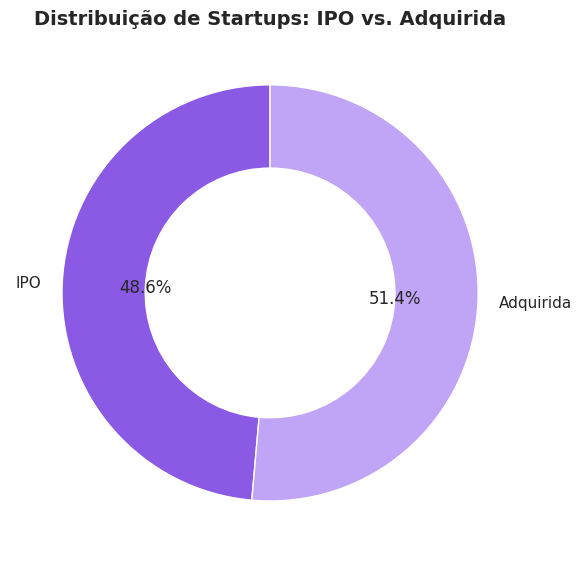

In [ ]:
labels = ['IPO', 'Adquirida']
valores = [df['IPO'].sum(), df['Adquirida'].sum()]
cores = ["#8a5ae5", "#c0a4f5"]

plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops=dict(width=0.4, edgecolor='white')  # cria o efeito de gráfico de rosca
)

plt.title("Distribuição de Startups: IPO vs. Adquirida", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


/tmp/ipython-input-313-1015807807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


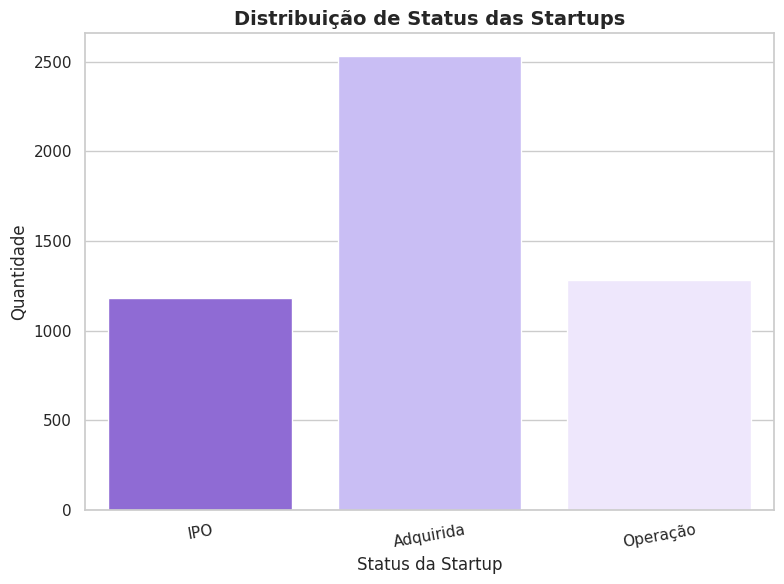

In [ ]:
sns.set(style='whitegrid')

df['Status da Startup'] = 'Operação'
df.loc[df['IPO'] == True, 'Status da Startup'] = 'IPO'
df.loc[df['Adquirida'] == True, 'Status da Startup'] = 'Adquirida'
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x='Status da Startup',
    order=['IPO', 'Adquirida', 'Operação'],
    palette=['#8a5ae5', '#c4b5fd', '#ede4ff'],)


plt.title('Distribuição de Status das Startups', fontsize=14, fontweight='bold')
plt.xlabel('Status da Startup', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

 ### 5. IPO e Aquisições

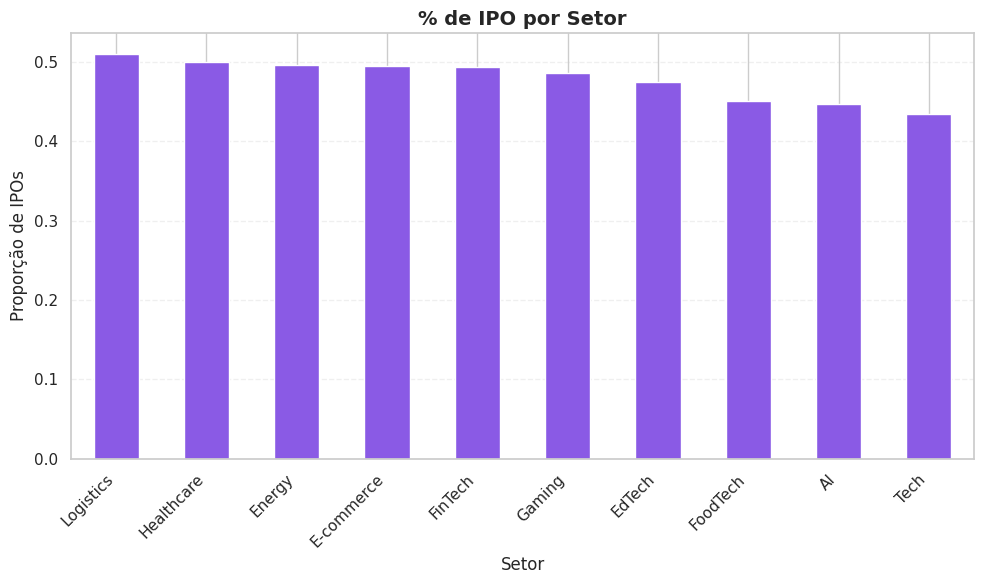

In [ ]:

df['ipo_numerico'] = df['IPO'].map({True: 1, False: 0})

plt.figure(figsize=(10, 6))
df.groupby('Setor')['ipo_numerico'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar',
    color='#8a5ae5'
)

plt.title('% de IPO por Setor', fontsize=14, fontweight='bold')
plt.ylabel('Proporção de IPOs', fontsize=12)
plt.xlabel('Setor', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df.drop('ipo_numerico', axis=1, inplace=True)


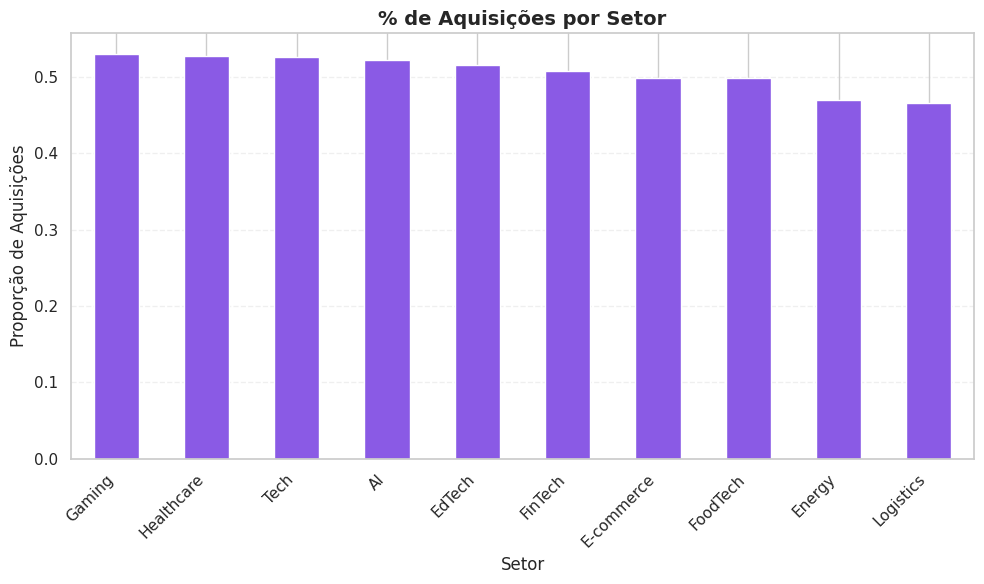

In [ ]:
df['adquirida_numerico'] = df['Adquirida'].map({True: 1, False: 0})

plt.figure(figsize=(10, 6))
df.groupby('Setor')['adquirida_numerico'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar',
    color='#8a5ae5'
)

plt.title('% de Aquisições por Setor', fontsize=14, fontweight='bold')
plt.ylabel('Proporção de Aquisições', fontsize=12)
plt.xlabel('Setor', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df.drop('adquirida_numerico', axis=1, inplace=True)


##4. Teste de Hipótese

In [ ]:
top_5_industrias = df['Setor'].value_counts().head(5).index.tolist()
df_top_industrias = df[df['Setor'].isin(top_5_industrias)]
samples = [
    df_top_industrias[df_top_industrias['Setor'] == industria]['Índice de Sucesso']
    for industria in top_5_industrias
]


In [ ]:
from scipy import stats
df_stat, p_value_anova = stats.f_oneway(*samples)
print(f"Estatística F: {df_stat:.4f}, P-valor: {p_value_anova:.4f}")


Estatística F: 1.5026, P-valor: 0.1987


In [ ]:
alpha = 0.05
print("\n--- Conclusão da ANOVA ---")
if p_value_anova < alpha:
    print(f"P-valor ({p_value_anova:.3f}) é MENOR que {alpha}, portanto, rejeitamos a hipótese nula.")
    print(">> Existe uma diferença estatisticamente significativa na pontuação de sucesso média entre os setores.")
else:
    print(f"P-valor ({p_value_anova:.3f}) é MAIOR que {alpha}, portanto, não rejeitamos a hipótese nula.")
    print(">> Não há evidência estatística para afirmar que a pontuação de sucesso média seja diferente entre os setores analisados.")



--- Conclusão da ANOVA ---
P-valor (0.199) é MAIOR que 0.05, portanto, não rejeitamos a hipótese nula.
>> Não há evidência estatística para afirmar que a pontuação de sucesso média seja diferente entre os setores analisados.
